Census Trade Data API with Python
======

## U.S. Exports by partner

------

*September 3, 2017*
*@bd_econ*

The documentation for the Census international trade API is [here](https://www.census.gov/data/developers/data-sets/international-trade.html)

In [1]:
import requests
import pandas as pd

import config
key = config.census_key

## Parameters/ Settings

In [2]:
base = 'https://api.census.gov/data/timeseries/intltrade/'
param = 'CTY_CODE,CTY_NAME,ALL_VAL_MO'
time = '2018-04'
flow = 'exports'
url = '{}{}/hs?get={}&key={}&time={}'.format(base, flow, param, key, time)

## Get data

In [9]:
r = requests.get(url).json()
date = r[1][-1]
df = pd.DataFrame(r[1:], columns=r[0])
df = df[(df['CTY_CODE'].str[0] !='0') & 
        (df['CTY_CODE'].str[1] != 'X') & 
        (~df['CTY_NAME'].str.contains('COUNTRIES'))
       ].set_index('CTY_NAME')['ALL_VAL_MO'].astype('float').sort_values()

## Plot top 20

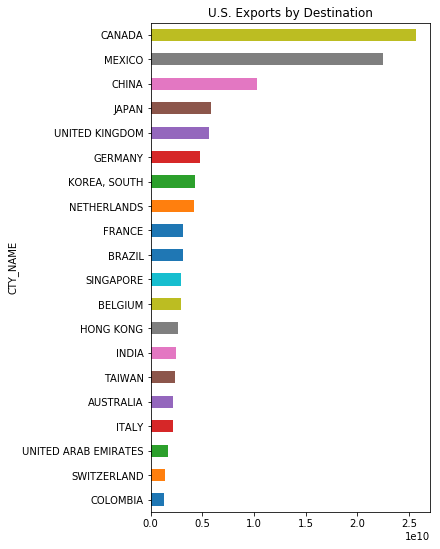

In [10]:
%matplotlib inline
df.tail(20).plot(kind='barh', figsize=(5,9), title='U.S. Exports by Destination')